# Predictive Analytics for S&P 500 Stock Prices: Analyzing Daily Returns and Moving Averages of Leading Tech Companies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#pip install seaborn

In [6]:
#pip install rglob

In [7]:
import glob

In [8]:
# Use the glob module to retrieve a list of file paths for CSV files in the specified directory.
glob.glob(r'D:\Work\Gre\UTD\Courses\Winter\Projects\Python\S_P_500_Stock_Prediction\individual_stocks_5yr/*.csv')

['D:\\Work\\Gre\\UTD\\Courses\\Winter\\Projects\\Python\\S_P_500_Stock_Prediction\\individual_stocks_5yr\\AAL_data.csv',
 'D:\\Work\\Gre\\UTD\\Courses\\Winter\\Projects\\Python\\S_P_500_Stock_Prediction\\individual_stocks_5yr\\AAPL_data.csv',
 'D:\\Work\\Gre\\UTD\\Courses\\Winter\\Projects\\Python\\S_P_500_Stock_Prediction\\individual_stocks_5yr\\AAP_data.csv',
 'D:\\Work\\Gre\\UTD\\Courses\\Winter\\Projects\\Python\\S_P_500_Stock_Prediction\\individual_stocks_5yr\\ABBV_data.csv',
 'D:\\Work\\Gre\\UTD\\Courses\\Winter\\Projects\\Python\\S_P_500_Stock_Prediction\\individual_stocks_5yr\\ABC_data.csv',
 'D:\\Work\\Gre\\UTD\\Courses\\Winter\\Projects\\Python\\S_P_500_Stock_Prediction\\individual_stocks_5yr\\ABT_data.csv',
 'D:\\Work\\Gre\\UTD\\Courses\\Winter\\Projects\\Python\\S_P_500_Stock_Prediction\\individual_stocks_5yr\\ACN_data.csv',
 'D:\\Work\\Gre\\UTD\\Courses\\Winter\\Projects\\Python\\S_P_500_Stock_Prediction\\individual_stocks_5yr\\ADBE_data.csv',
 'D:\\Work\\Gre\\UTD\\Courses

In [9]:
len(glob.glob(r'D:\Work\Gre\UTD\Courses\Winter\Projects\Python\S_P_500_Stock_Prediction\individual_stocks_5yr/*.csv'))

509

## # Define a list of file paths for individual stock data CSV files

In [10]:
company_list = [
    r'D:\\Work\\Gre\\UTD\\Courses\\Winter\\Projects\\Python\\S_P_500_Stock_Prediction\\individual_stocks_5yr\\AAPL_data.csv',
    r'D:\\Work\\Gre\\UTD\\Courses\\Winter\\Projects\\Python\\S_P_500_Stock_Prediction\\individual_stocks_5yr\\AMGN_data.csv',
    r'D:\\Work\\Gre\\UTD\\Courses\\Winter\\Projects\\Python\\S_P_500_Stock_Prediction\\individual_stocks_5yr\\GOOG_data.csv',
    r'D:\\Work\\Gre\\UTD\\Courses\\Winter\\Projects\\Python\\S_P_500_Stock_Prediction\\individual_stocks_5yr\\MSFT_data.csv'
]

In [11]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

#  Initialize an empty DataFrame 'all_data' and concatenate individual stock data from CSV files into it.

In [12]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df ],ignore_index=True)

In [13]:
all_data.shape

(4752, 7)

In [14]:
all_data.head(6)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL


In [15]:
all_data['Name'].unique()

array(['AAPL', 'AMGN', 'GOOG', 'MSFT'], dtype=object)

## Cleaning Data


In [16]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [17]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [18]:
# Convert the 'date' column in the 'all_data' DataFrame to datetime format.
all_data['date'] = pd.to_datetime(all_data['date'])

In [19]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
4747   2018-02-01
4748   2018-02-02
4749   2018-02-05
4750   2018-02-06
4751   2018-02-07
Name: date, Length: 4752, dtype: datetime64[ns]

In [20]:
tech_list = all_data['Name'].unique()

In [21]:
tech_list

array(['AAPL', 'AMGN', 'GOOG', 'MSFT'], dtype=object)

##  Plot stock closing prices for each company in 'tech_list' using Matplotlib.

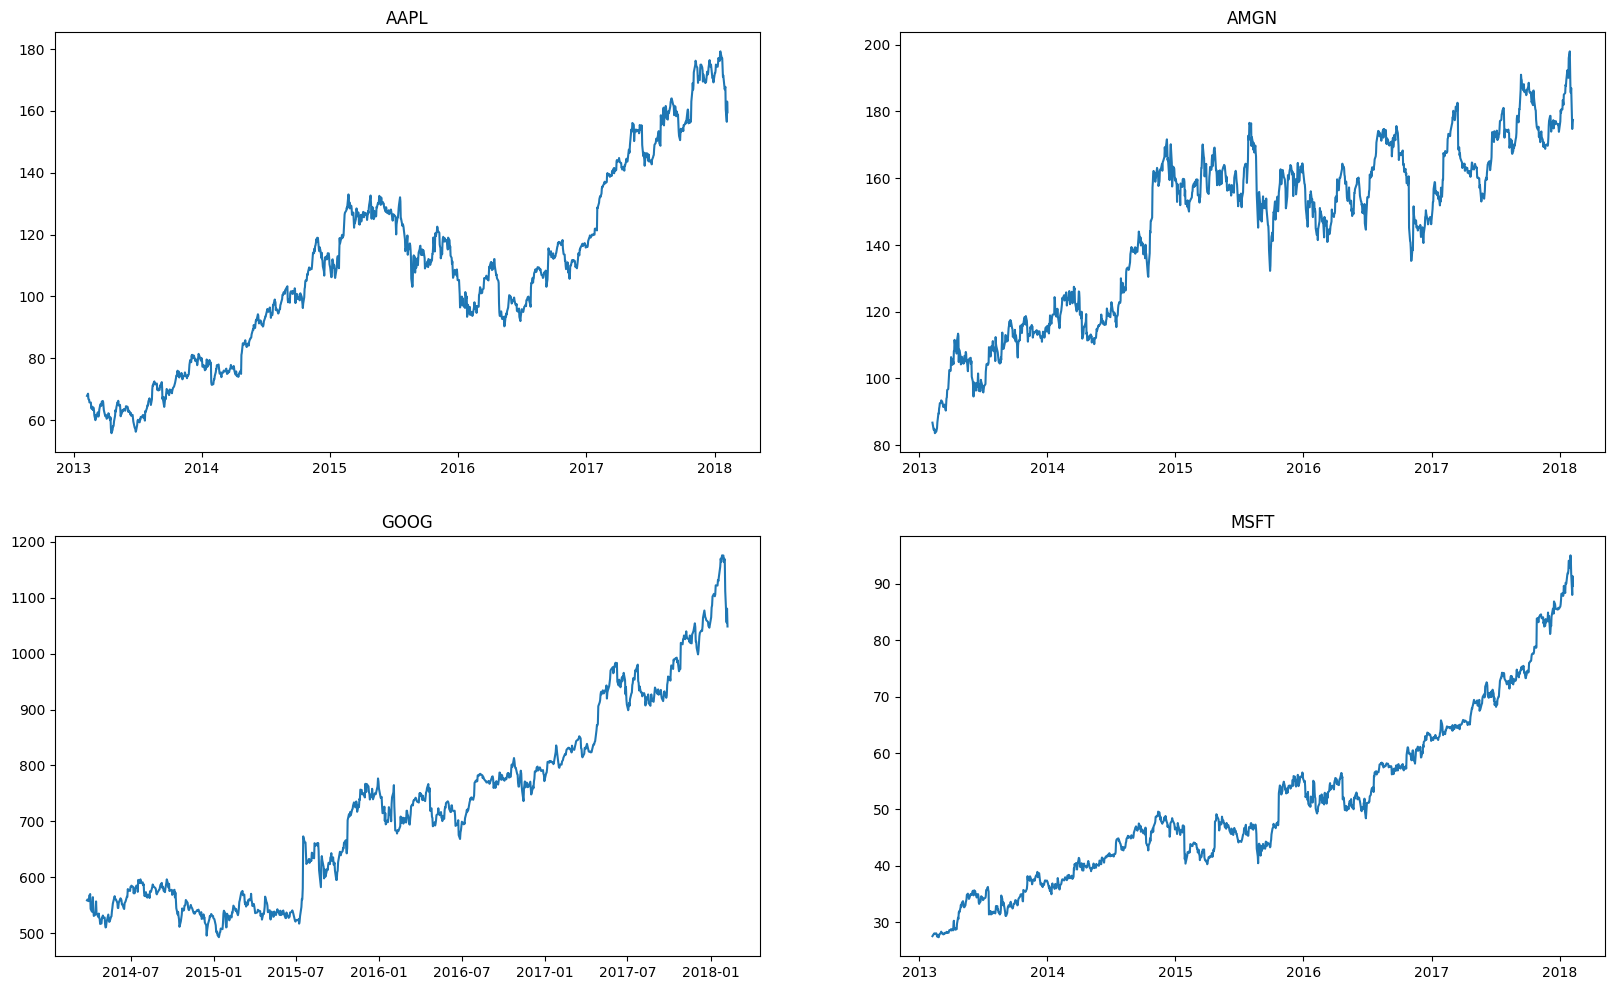

In [22]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter1 = all_data['Name'] == company
    df = all_data[filter1]
    plt.plot(df['date'], df['close'])
    plt.title(company)

# Data Insights
For Apple -> we observe the trend for the apple closing prices for the year, we see that in the year 2015 apple has a peak and then fall till 2017, where it increased again

For Microsoft and Amazon we observe that they are performing almost similarly because of similar trend

## # Calculate the 10-day rolling mean of the 'close' column in the 'all_data' DataFrame.

In [24]:
all_data['close'].rolling(window=10).mean().head(14)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     66.03251
10    65.57280
11    65.13051
12    64.79722
13    64.43137
Name: close, dtype: float64

In [26]:
new_data = all_data.copy()

## Calculate moving averages (MA) for specified days and add new columns to 'new_data'.

In [27]:
ma_day = [10,20,50]

for ma in ma_day:
    new_data['close_'+str(ma)]=new_data['close'].rolling(ma).mean()

In [32]:
new_data.head(30)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL,NaN,NaN,NaN
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL,NaN,NaN,NaN
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL,NaN,NaN,NaN
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL,NaN,NaN,NaN
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL,66.03251,NaN,NaN


### If your going to consider higher value of window parameter say 50 you have slight change in the value, the moment your window size reduces to 10 you will observe higher change in the values


In [33]:
new_data.set_index('date', inplace=True)

In [34]:
new_data

,open,high,low,close,volume,Name,close_10,close_20,close_50
date,,,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684


In [35]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

## Plot the moving averages for each company in 'tech_list' using Matplotlib using closing prices of different window length

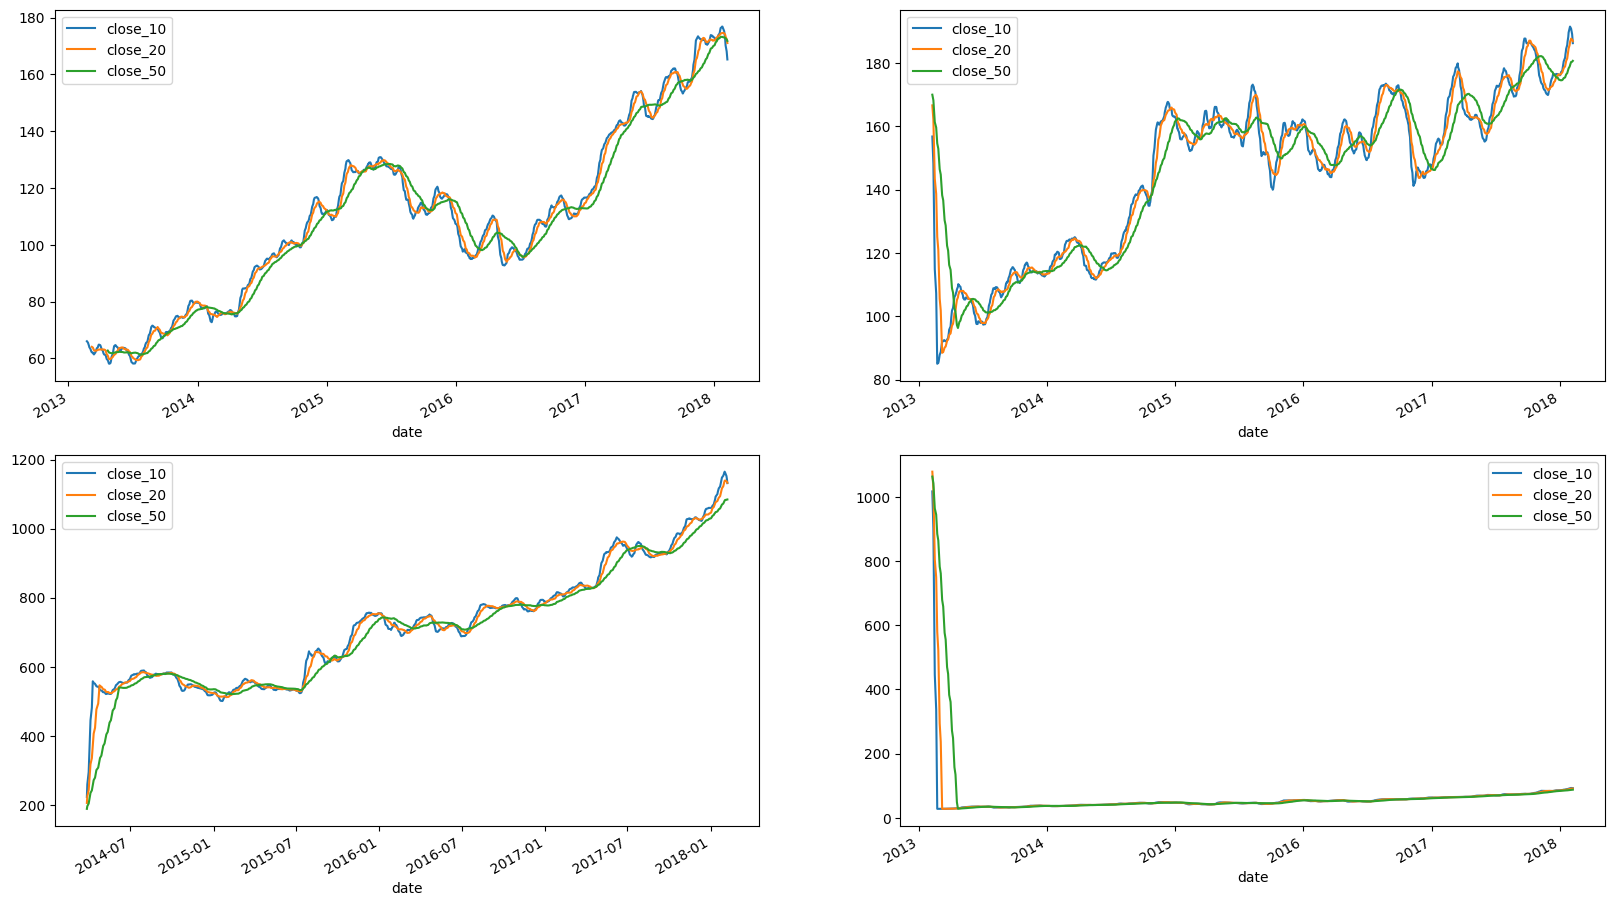

In [36]:
plt.figure(figsize=(20,12))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2,2, index)
    filter1 = new_data['Name']==company
    df=new_data[filter1]
    df[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())

In [37]:
company_list

['D:\\\\Work\\\\Gre\\\\UTD\\\\Courses\\\\Winter\\\\Projects\\\\Python\\\\S_P_500_Stock_Prediction\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'D:\\\\Work\\\\Gre\\\\UTD\\\\Courses\\\\Winter\\\\Projects\\\\Python\\\\S_P_500_Stock_Prediction\\\\individual_stocks_5yr\\\\AMGN_data.csv',
 'D:\\\\Work\\\\Gre\\\\UTD\\\\Courses\\\\Winter\\\\Projects\\\\Python\\\\S_P_500_Stock_Prediction\\\\individual_stocks_5yr\\\\GOOG_data.csv',
 'D:\\\\Work\\\\Gre\\\\UTD\\\\Courses\\\\Winter\\\\Projects\\\\Python\\\\S_P_500_Stock_Prediction\\\\individual_stocks_5yr\\\\MSFT_data.csv']

## Read the Apple stock data from the specified CSV file into a DataFrame.

In [38]:
apple = pd.read_csv(r'D:\\Work\\Gre\\UTD\\Courses\\Winter\\Projects\\Python\\S_P_500_Stock_Prediction\\individual_stocks_5yr\\AAPL_data.csv')

In [39]:
apple

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,2018-02-01,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,2018-02-02,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,2018-02-05,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,2018-02-06,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


In [41]:
apple['close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: close, Length: 1259, dtype: float64

In [43]:
apple.head(4)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL


## Calculate the daily percentage return for the 'close' column in the 'apple' DataFrame.

In [44]:
apple['Daily return (in %)'] = apple['close'].pct_change()

In [45]:
apple.head(4)

,date,open,high,low,close,volume,Name,Daily return (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.010422
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-0.025067
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.001903


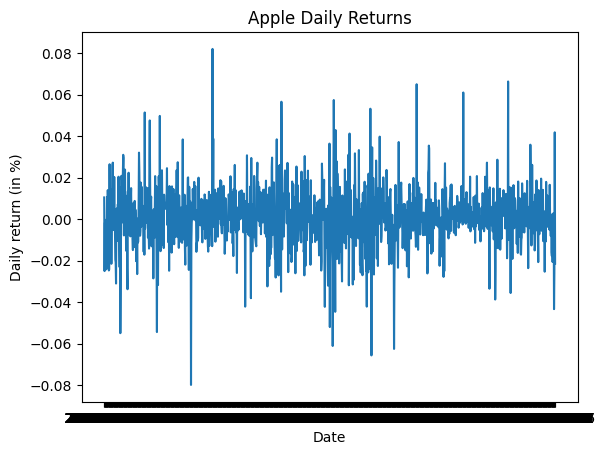

In [53]:
import matplotlib.pyplot as plt

plt.plot(apple['date'], apple['Daily return (in %)'])
plt.title('Apple Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily return (in %)')
plt.show()

# Data Insights
## As we can see the apple daily returns are fluctuating as we can see initially It drops down, probably due to merger of apple with a small company, which its stakeholders are not happy about, so the market plummets quickly, then we see a sharp increase, probably due to new phone launched by apple, increasing the stocks prices 